<a href="https://colab.research.google.com/github/imdebarun/tensorflow2/blob/main/Neural_Network_Classification_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### What is to be covered under Neural Network Classification -
* Architecture of a neural network classification model
* Input shapes and output shapes of a classification model (features and labels)
* Creating custom data and view and fit
* Steps in modelling -
> * Creating a model, compiling a model, fitting a model, evaluating a model
* Different classification evaluation methods
* Saving and Loading models

A Classification is where you try to classify something as oone thing or another.
A few types of classification problems -
* Binary Classification
* Multiclass Classification
* Multilabel Classification

### Creating data to view and fit -

In [1]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state=42)

In [2]:
# Check out the features
X[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [3]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [4]:
# Let's visualize the data - cause it is little hard to understand
import pandas as pd

circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


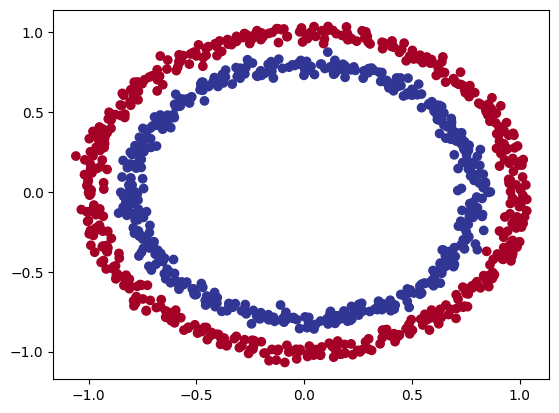

In [5]:
# Visualize with a plot

import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, cmap = plt.cm.RdYlBu);

## Input and Output shapes

In [6]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# How many samples we are working with
len(X), len(y)

(1000, 1000)

In [8]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

### Steps in modelling -
The steps in modelling with TensorFlow are typically :
1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate ...

In [9]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

# Set the random seed-
tf.random.set_seed(42)

# 1. Create the model using Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
# 2. Compile the model
model_1.compile( loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                 metrics = ['accuracy'] )
# 3. Fit the Model
model_1.fit(X, y, epochs = 5)

2.15.0
Epoch 1/5
32/32 [==============================] - 1s 3ms/step - loss: 4.3012 - accuracy: 0.4720
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 4.7124 - accuracy: 0.5450
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 4.5362 - accuracy: 0.5310
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 4.4055 - accuracy: 0.5250
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 4.3683 - accuracy: 0.5250


In [10]:
# Let's try and improve our model by training for longer...
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 4ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we are working on a binary classsification problem and our model is getting around ~50% accuaracy.. it's performing as if it guessing.
Let's step things up a notch and add an extra layer.

In [11]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_2.fit(X,y, epochs=100, verbose=0)

In [12]:
#4. Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

### Improve our Model further:
Let's look into our bag of trics to see how we can improve our model.
1. Create a model - add more layers or increase the number of hidden uits withing a layer.
2. Compiling a model - here we might to choose a different optimization function such as Adam instead of SGD.
3. Fitting a model - perhaps we might fit our model for more epochs (leave it training for longer).

* Common ways to improve a deep model:
>- Adding layers
>- Increase the number of hidden units
>- change the activation function
>- change the optimization function
>- change the learning rate
>- Fitting on more data
>- Fitting for longer


In [13]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile our model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# 3. Fit the model
model_3.fit(X,y, epochs=100, verbose=0)

In [14]:
# 4. Evaluate the model
model_3.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.7016 - accuracy: 0.5090


[0.7015605568885803, 0.5090000033378601]

##### To visualize our model's predictions let's create a function `plot_decision_boundary()`, this function will:
* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* plot the predictions as well as a line between zones (where each unique class falls)

In [15]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
  y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  # Create X value (We're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) >1 :
    print(" Doing multiclass classification")
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("Doing Binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
Doing Binary classification


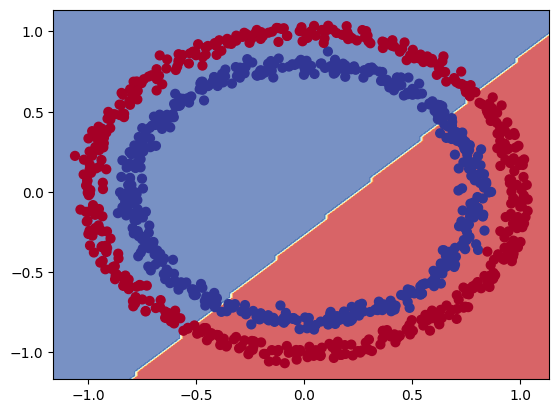

In [16]:
# Check out the predictions our model is making:
plot_decision_boundary(model = model_3, X = X, y = y)

In [17]:
# Let's see if our model can be used for regression problem...

tf.random.set_seed(42)

# Create some regression data -
X_regression = tf.range(0, 1000, 5)
Y_regression = tf.range(100, 1100, 5)

# Split our regression data in train test set:
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = Y_regression[:150]
y_reg_test = Y_regression[150:]

# Fit our model to regression data:
# model_3.fit(X_reg_train, y_reg_train, epochs=100)

In [18]:
# Setup random seeed
tf.random.set_seed(42)

# 1. Create the model.
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics = ['mae'])

# 3. Fit the model
model_4.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 6ms/step - loss: 321.8294 - mae: 321.8294
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 220.6810 - mae: 220.6810
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 119.9106 - mae: 119.9106
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 47.3067 - mae: 47.3067
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 74.8048 - mae: 74.8048
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 67.2920 - mae: 67.2920
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 43.7374 - mae: 43.7374
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 50.5524 - mae: 50.5524
Epoch 9/100
5/5 [==============================] - 0s 5ms/step - loss: 42.2535 - mae: 42.2535
Epoch 10/100
5/5 [==============================] - 0s 5ms/step - loss: 45.2846 - mae: 45.2846
Epoch 11/100
5/5 [==============================] - 0

2/2 [==============================] - 0s 8ms/step


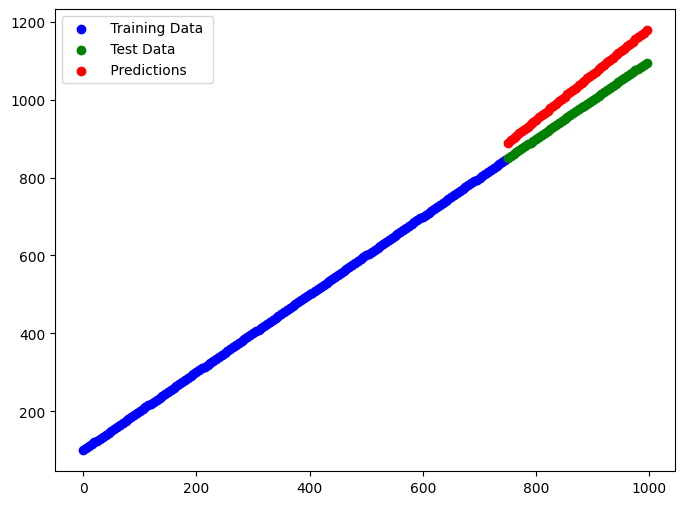

In [19]:
# Make predictions with our trained model:
y_reg_preds = model_4.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(8,6))
plt.scatter(X_reg_train, y_reg_train, c='b', label =" Training Data ")
plt.scatter(X_reg_test, y_reg_test, c="g", label = " Test Data ")
plt.scatter(X_reg_test, y_reg_preds, c="r", label = " Predictions ")
plt.legend();

### The Missing piece Non-linearity

In [20]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

# 3. Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 5.8729 - accuracy: 0.4800
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 5.8664 - accuracy: 0.4800
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 5.8347 - accuracy: 0.4820
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 5.7763 - accuracy: 0.4830
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7598 - accuracy: 0.4820
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7271 - accuracy: 0.4810
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 5.7207 - accuracy: 0.4820
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 5.6979 - accuracy: 0.4810
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 5.6222 - accuracy: 0.4790
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 5.5596 - accuracy: 0.4790
Epoch 11/

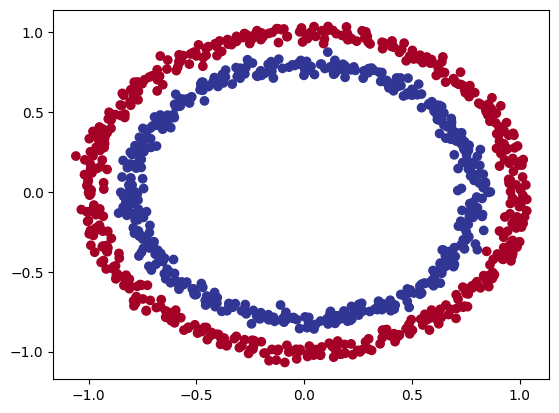

In [21]:
# Check out our data
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 1s 3ms/step
Doing Binary classification


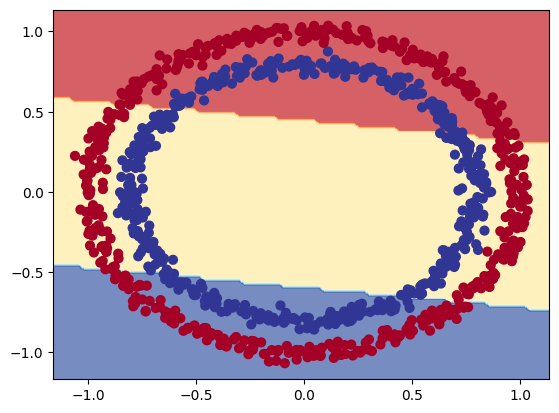

In [22]:
# Check the decision boundary for our latest model:
plot_decision_boundary(model=model_5, X = X, y = y)

Let's now try to build a neural network with activation function - non-linear

In [23]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# 2. Compile a model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

# 3. Fit the model
history=model_6.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 8ms/step - loss: 5.7155 - accuracy: 0.4870
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 5.6871 - accuracy: 0.4860
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 5.6183 - accuracy: 0.4820
Epoch 4/100
32/32 [==============================] - 0s 7ms/step - loss: 5.5676 - accuracy: 0.4780
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 5.4761 - accuracy: 0.4740
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 5.3134 - accuracy: 0.4730
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 5.0014 - accuracy: 0.4710
Epoch 8/100
32/32 [==============================] - 0s 6ms/step - loss: 4.7523 - accuracy: 0.4690
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 4.6783 - accuracy: 0.4690
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 4.6368 - accuracy: 0.4680
Epoch 11/

In [25]:
# Time to replicate the multi-layer neural network from TensorFlow playground
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

# 3. Fit the model
history = model_7.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

In [26]:
# Evaluate the model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

313/313 [==============================] - 1s 2ms/step
Doing Binary classification


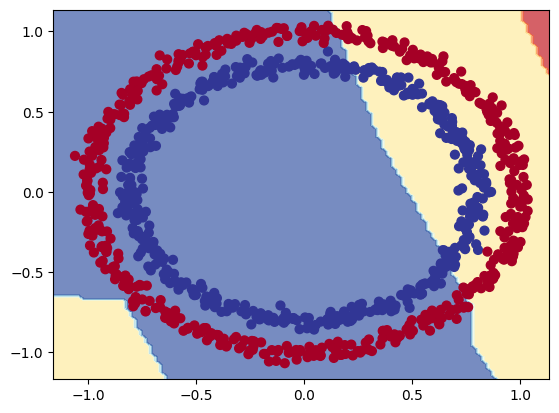

In [27]:
# How do our model predictions look?
plot_decision_boundary(model_7, X, y)

In [28]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

# 3. Fit the model
history = model_8.fit(X, y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.7065 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7005 - accuracy: 0.4960
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6965 - accuracy: 0.4960
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.4920
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6920 - accuracy: 0.5030
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6900 - accuracy: 0.4950
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6884 - accuracy: 0.5110
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6870 - accuracy: 0.5150
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6855 - accuracy: 0.5250
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6844 - accuracy: 0.5170
Epoch 11/

In [29]:
# Evaluate model
model_8.evaluate(X,y)

32/32 [==============================] - 0s 5ms/step - loss: 0.4050 - accuracy: 0.8970


[0.4050377905368805, 0.8970000147819519]

313/313 [==============================] - 1s 2ms/step
Doing Binary classification


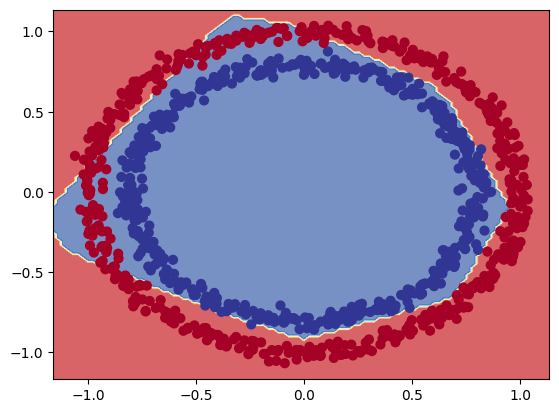

In [30]:
# Let's visualize -
plot_decision_boundary(model_8, X, y)